<a href="https://colab.research.google.com/github/JabbarHakim/DATA-STRUCTURE-SEMESTER-II/blob/main/Data%20Structure%20X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIJKSTRA

In [ ]:
!pip install networkx matplotlib

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
  distances = {node: float('inf') for node in graph}
  distances[start] = 0
  pervious = {node: None for node in graph}
  queue = [(0, start)]

  while queue:
    current_distance, current_node = heapq.heappop(queue)

    for neighbor, weight in graph[current_node].items():
      distance = current_distance + weight

      if distance < distances[neighbor]:
        distances[neighbor] = distance
        previous[neighbor] = current_node
        heapq.heappush(queue, (distance, neighbor))

  return distance, previous

In [ ]:
def get_path(previuos, target):
  path = []
  while target is not None:
    path.insert(0, target)
    target = previous[target]

  return path

In [ ]:
def visualize_graph(graph, path=None):
  G = nx.DiGraph()

  for node in graph:
    for neighbor, weight in graph[node].items():
      G.add_edge(node, neighbor, weight=weight)
  pos = nx.spring_layout(G)
  edge_labels = nx.get_edge_atrributes(G, 'weight')

  plt.figures(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrow=True)


  #GARIS TEBAL UNTUK JALUR TERPENDEK\
  if path and len(path) > 1:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edge_labels(G, pos, edgelist=path_edges, edge_color='red', width=3)

  plt.title("Visualisasi Graf dan Jalur Terpendek")
  plt.axis('off')
  plt.show()

Jarak dari A ke Z: 14
Jalur : A→B→D→E→Z


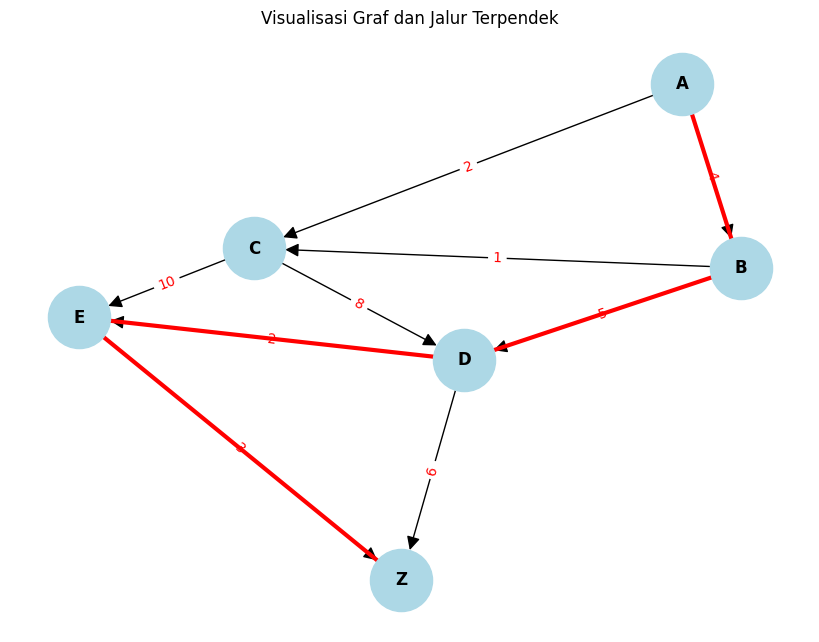

In [20]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
  distances = {node: float('inf') for node in graph}
  distances[start] = 0
  pervious = {node: None for node in graph}
  queue = [(0, start)]

  while queue:
    current_distance, current_node = heapq.heappop(queue)

    # If we've already found a shorter path, skip
    if current_distance > distances[current_node]:
        continue

    for neighbor, weight in graph[current_node].items():
      distance = current_distance + weight

      if distance < distances[neighbor]:
        distances[neighbor] = distance
        previous[neighbor] = current_node
        heapq.heappush(queue, (distance, neighbor))

  # Return the distances dictionary and the previous dictionary
  return distances, previous


def get_path(previous, target): # Corrected parameter name
  path = []
  while target is not None:
    path.insert(0, target)
    # Ensure target is a key in the previous dictionary
    if target in previous:
        target = previous[target]
    else:
        # Handle cases where target is not reachable from the start node
        return []
  return path

def visualize_graph(graph, path=None):
  G = nx.DiGraph()

  for node in graph:
    for neighbor, weight in graph[node].items():
      G.add_edge(node, neighbor, weight=weight)
  pos = nx.spring_layout(G)
  # Corrected function name
  edge_labels = nx.get_edge_attributes(G, 'weight')

  # Corrected function name
  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrowsize=20) # Increased arrow size

  # Draw edge labels for all edges
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


  # Highlight the shortest path edges
  if path and len(path) > 1:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)


  plt.title("Visualisasi Graf dan Jalur Terpendek")
  plt.axis('off')
  plt.show()

#DEFINISI GRAF

graph = {
    "A": {"B": 4, "C": 2},
    "B": {"C": 1, "D": 5},
    "C": {"D": 8, "E": 10},
    "D": {"E": 2, "Z": 6},
    "E": {"Z": 3},
    "Z": {}
}

#JALANKAN DIJKSTRA

start_node = "A"
end_node = "Z"
# The dijkstra_with_paths function now returns distances and previous
distances, previous = dijkstra_with_paths(graph, start_node)


# REKONTRUKSI JALUR
# Ensure end_node is a key in the previous dictionary before calling get_path
if end_node in previous:
    shortest_path = get_path(previous, end_node)
    if shortest_path: # Check if a path was found
        print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
        print(f"Jalur : {'→'.join(shortest_path)}")
        visualize_graph(graph, path=shortest_path)
    else:
        print(f"Tidak ada jalur dari {start_node} ke {end_node}")
        visualize_graph(graph) # Visualize the graph without a path
else:
    print(f"Node akhir '{end_node}' tidak ditemukan dalam hasil perhitungan jalur.")
    visualize_graph(graph) # Visualize the graph without a path

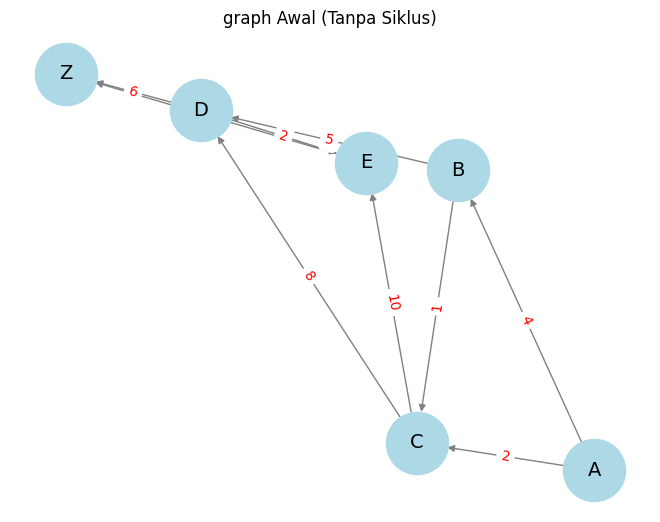

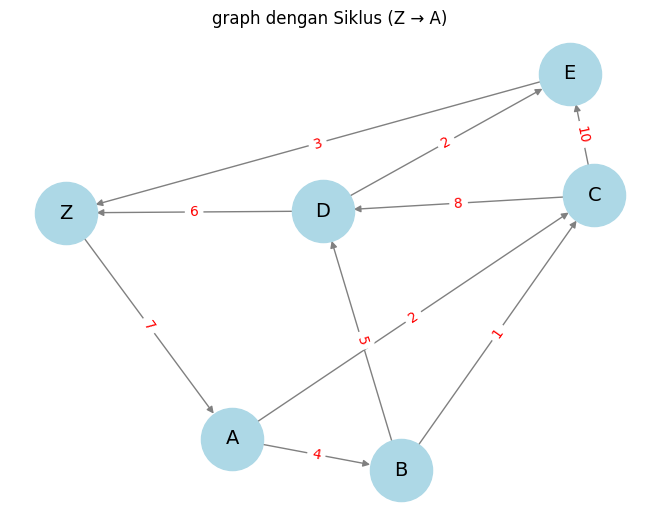

Jalur terpendek dari A ke Z: ['A', 'B', 'D', 'E', 'Z']
Total bobot: 14


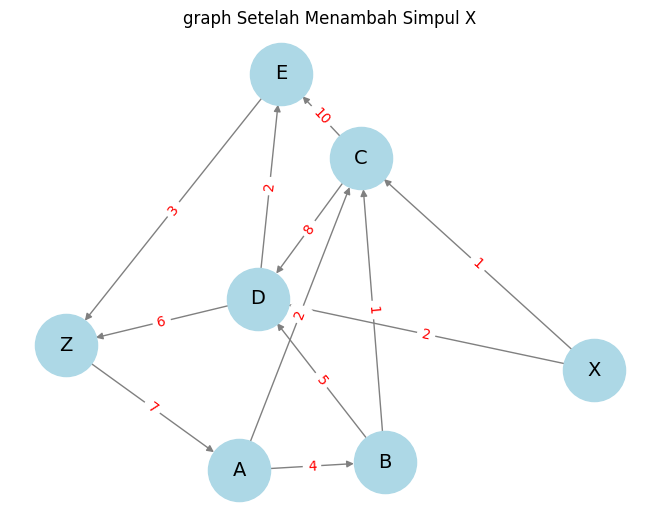

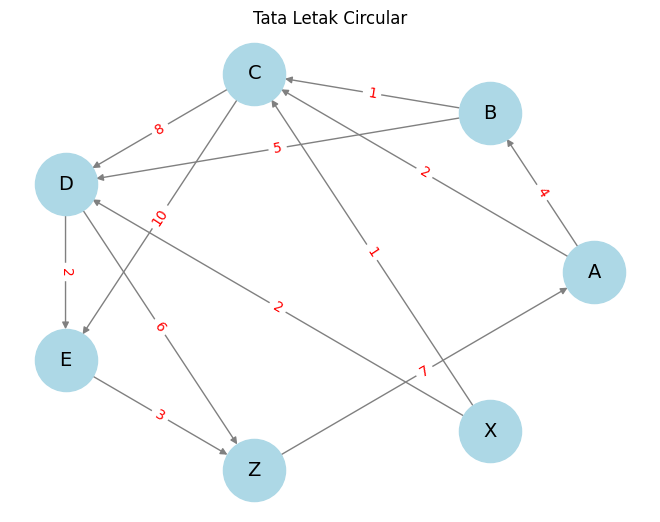

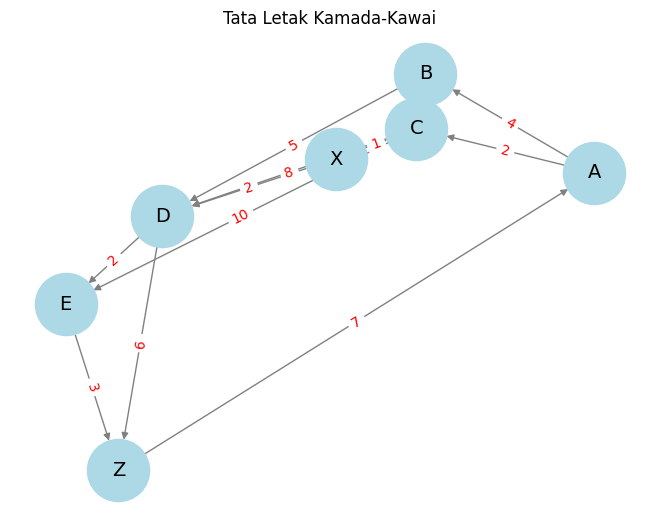

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Representasi graph berbobot (directed)
graph = {
    "A": {"B": 4, "C": 2},
    "B": {"C": 1, "D": 5},
    "C": {"D": 8, "E": 10},
    "D": {"E": 2, "Z": 6},
    "E": {"Z": 3},
    "Z": {}
}

# 1. Buat graph berarah berbobot dari dictionary
G = nx.DiGraph()

for node, edges in graph.items():
    for neighbor, weight in edges.items():
        G.add_edge(node, neighbor, weight=weight)

# Fungsi untuk menggambar graph
def gambar_graph(graph, pos=None, title="graph"):
    if pos is None:
        pos = nx.spring_layout(graph, seed=42)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, edge_color='gray', arrows=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

# Gambar graph awal
gambar_graph(G, title="graph Awal (Tanpa Siklus)")

# 2. Tambahkan siklus (misal: dari Z ke A)
G.add_edge("Z", "A", weight=7)
gambar_graph(G, title="graph dengan Siklus (Z → A)")

# 3. Tambahkan simpul baru dan koneksi
G.add_edge("X", "C", weight=1)
G.add_edge("X", "D", weight=2)

# Jalur terpendek dari A ke Z setelah modifikasi
path = nx.shortest_path(G, source="A", target="Z", weight="weight")
length = nx.shortest_path_length(G, source="A", target="Z", weight="weight")
print("Jalur terpendek dari A ke Z:", path)
print("Total bobot:", length)

gambar_graph(G, title="graph Setelah Menambah Simpul X")

# 4. Visualisasi dengan layout circular
gambar_graph(G, pos=nx.circular_layout(G), title="Tata Letak Circular")

# Visualisasi dengan layout kamada_kawai
gambar_graph(G, pos=nx.kamada_kawai_layout(G), title="Tata Letak Kamada-Kawai")
